<a href="https://colab.research.google.com/github/jadhav-rakesh/NLP/blob/main/sentiment_analysis_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
!wget --no-check-certificate \
    -O /tmp/sentiment.csv https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P

--2025-02-07 11:38:37--  https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P
Resolving drive.google.com (drive.google.com)... 172.253.115.138, 172.253.115.139, 172.253.115.101, ...
Connecting to drive.google.com (drive.google.com)|172.253.115.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P [following]
--2025-02-07 11:38:37--  https://drive.usercontent.google.com/download?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.115.132, 2607:f8b0:4004:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.115.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 127831 (125K) [application/octet-stream]
Saving to: ‘/tmp/sentiment.csv’

/tmp/sentiment.csv  100%[===================>] 124.83K  --.-KB/s    in 0.02s   

2025-02-07 11:38:39 (7

In [ ]:
import numpy as np
import pandas as pd

dataset = pd.read_csv("/tmp/sentiment.csv")

sentences = dataset["text"].tolist()
labels = dataset["sentiment"].tolist()

In [ ]:
import tensorflow_datasets as tfds

vocab_size = 1000
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(sentences, vocab_size, max_subword_length=5)

In [ ]:
num = 5
print(sentences[num])
encoded = tokenizer.encode(sentences[num])
print(encoded)

for i in encoded:
    print(tokenizer.decode([i]))

I have to jiggle the plug to get it to line up right to get decent volume.
[4, 31, 6, 849, 162, 450, 12, 1, 600, 438, 775, 6, 175, 14, 6, 55, 213, 159, 474, 775, 6, 175, 614, 380, 295, 148, 72, 789]
I 
have 
to 
j
ig
gl
e 
the 
pl
ug
 
to 
get 
it 
to 
li
ne 
up 
right
 
to 
get 
dec
ent 
vo
lu
me
.


In [ ]:
for i, sentence in enumerate(sentences):
    sentences[i] = tokenizer.encode(sentence)

In [ ]:
sentences[1]

[625, 677, 626, 274, 380, 633, 148, 844, 789]

In [21]:
max_length = 50
trunc_type = "post"
padding_type = "post"

sentences_padded = pad_sequences(sentences, maxlen=max_length,
                                 padding=padding_type, truncating=trunc_type)

training_size = int(len(sentences) * 0.8)

training_sentences = sentences_padded[0:training_size]
testing_sentences = sentences_padded[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [ ]:
tf.keras.backend.clear_session()

embedding_dim = 16

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ ?                           │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
num_epochs = 30
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(training_sentences,training_labels_final, epochs=num_epochs, validation_data=(testing_sentences, testing_labels_final))

Epoch 1/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5328 - loss: 0.6932 - val_accuracy: 0.4812 - val_loss: 0.6931
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5715 - loss: 0.6900 - val_accuracy: 0.5414 - val_loss: 0.6898
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6311 - loss: 0.6833 - val_accuracy: 0.5113 - val_loss: 0.6896
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6615 - loss: 0.6737 - val_accuracy: 0.5138 - val_loss: 0.6908
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6653 - loss: 0.6628 - val_accuracy: 0.6065 - val_loss: 0.6673
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7145 - loss: 0.6438 - val_accuracy: 0.7343 - val_loss: 0.6433
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7537 - loss: 0.6219 - val_accuracy: 0.7619 - val_loss: 0.6214
Epoch 8/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8018 - loss: 0.5900 - val_accuracy: 0.7544 - val_loss:

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 50, 16)              │          16,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 16)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 6)                   │             102 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 48,329 (188.79 KB)

 Trainable params: 16,109 (62.93 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 32,220 (125.86 KB)

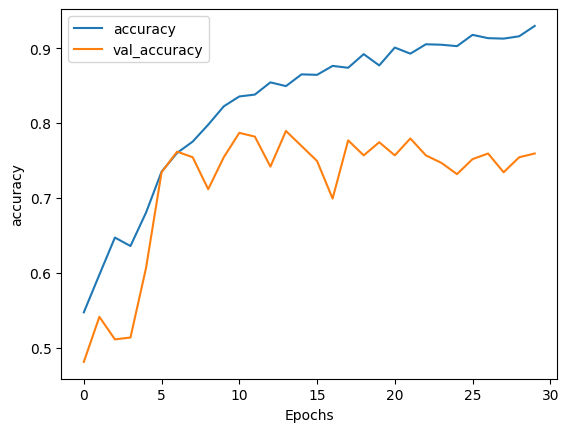

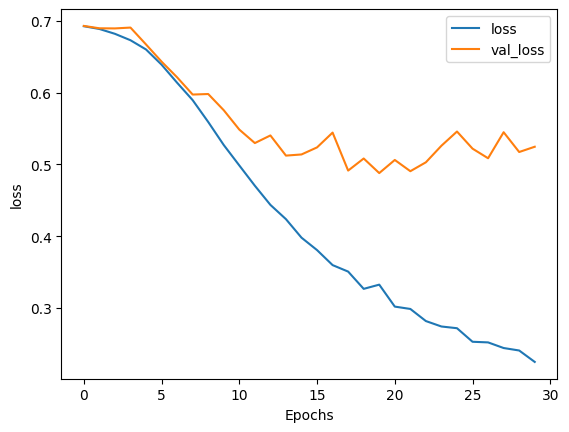

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history["val_"+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, "val_"+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
# First get the weights of the embedding layer
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(1000, 16)


In [ ]:
import io

# Write out the embedding vectors and metadata
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(0, vocab_size - 1):
  word = tokenizer.decode([word_num])
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
# Download the files
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
def predict_review(model, new_sentences, maxlen=max_length, show_padded_sequences=True):
    new_sequences = []

    for i, frvw in enumerate(new_sentences):
        new_sequences.append(tokenizer.encode(frvw))

    trunc_type = "post"
    padding_type = "post"

    new_reviews_padded = pad_sequences(new_sequences, maxlen=max_length,
                                      padding=padding_type, truncating=trunc_type)

    classes = model.predict(new_reviews_padded)

    for x in range(len(new_sentences)):
        if (show_padded_sequences):
            print(new_reviews_padded[x])
        print(new_sentences[x])
        print(classes[x])
        print("\n")

In [20]:
fake_reviews = ["I love this phone",
                "Everything was cold",
                "Everything was hot exactly as I wanted",
                "Everything was green",
                "the host seated us immediately",
                "they gave us free chocolate cake",
                "we couldn't hear each other talk because of the shouting in the kitchen"
              ]

predcit_review(model, fake_reviews)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
[  4 281  16  25   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
I love this phone
[0.8362441]


[812 227 864 100 775   9 525 843   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was cold
[0.18746085]


[812 227 864 100 775   9 109   8 333 731  24  61   4 171  59  77   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was hot exactly as I wanted
[0.31002295]


[812 227 864 100 775   9 157 359 853   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was green
[0.1

In [29]:
def fit_model_now(model, sentences):
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    model.summary()
    history = model.fit(training_sentences, training_labels_final, epochs=num_epochs,
                        validation_data=(testing_sentences, testing_labels_final))
    return history

def plot_results(history):
    plot_graphs(history, "accuracy")
    plot_graphs(history, "loss")

def fit_model_and_show_results(model, sentences):
    tf.keras.backend.clear_session()
    history = fit_model_now(model, sentences)
    plot_results(history)
    predict_review(model, sentences)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - accuracy: 0.5177 - loss: 0.6929 - val_accuracy: 0.4185 - val_loss: 0.6943
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.6217 - loss: 0.6819 - val_accuracy: 0.6867 - val_loss: 0.6389
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.7564 - loss: 0.5828 - val_accuracy: 0.7619 - val_loss: 0.5175
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.8486 - loss: 0.3947 - val_accuracy: 0.7769 - val_loss: 0.4801
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9112 - loss: 0.2866 - val_accuracy: 0.7469 - val_loss: 0.5367
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9182 - loss: 0.2549 - val_accuracy: 0.7669 - val_loss: 0.5676
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9351 - loss: 0.2006 - val_accuracy: 0.7594 - val_loss: 0.6448
Epoch 8/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.9635 - loss: 0.1404 - val_accuracy: 0.7694 - v

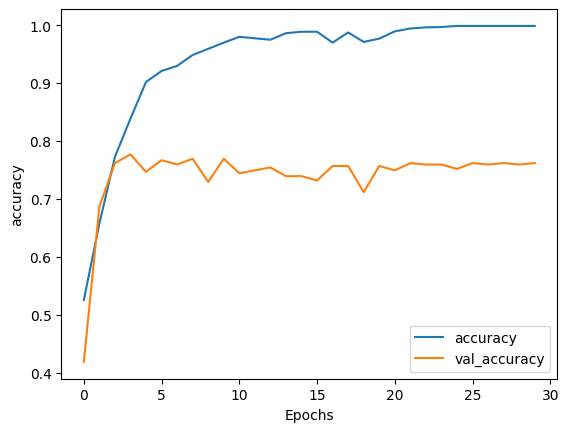

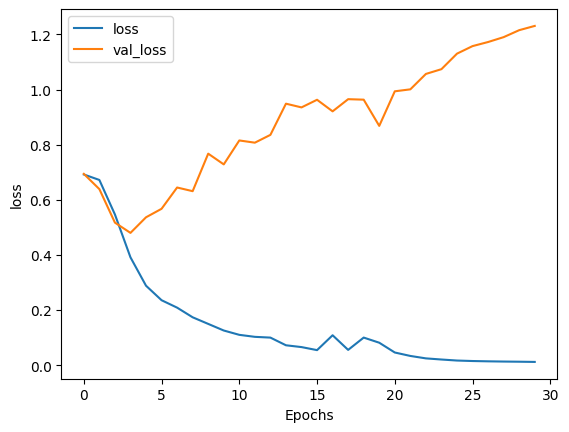

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
[  4 281  16  25   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
I love this phone
[0.9971908]


[812 227 864 100 775   9 525 843   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was cold
[0.00102737]


[812 227 864 100 775   9 109   8 333 731  24  61   4 171  59  77   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was hot exactly as I wanted
[0.6400426]


[812 227 864 100 775   9 157 359 853   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was green
[0.0

In [30]:
model_bidi_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

fit_model_and_show_results(model_bidi_lstm, fake_reviews)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - accuracy: 0.5370 - loss: 0.6917 - val_accuracy: 0.4862 - val_loss: 0.6940
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.6294 - loss: 0.6517 - val_accuracy: 0.7268 - val_loss: 0.5479
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.8238 - loss: 0.4421 - val_accuracy: 0.7619 - val_loss: 0.5127
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.8832 - loss: 0.3171 - val_accuracy: 0.7519 - val_loss: 0.5535
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.9266 - loss: 0.2295 - val_accuracy: 0.7393 - val_loss: 0.6157
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.9336 - loss: 0.2202 - val_accuracy: 0.7118 - val_loss: 0.8168
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.9426 - loss: 0.1749 - val_accuracy: 0.7444 - val_loss: 0.7091
Epoch 8/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.9445 - loss: 0.1651 - val_accuracy: 0.7469 - 

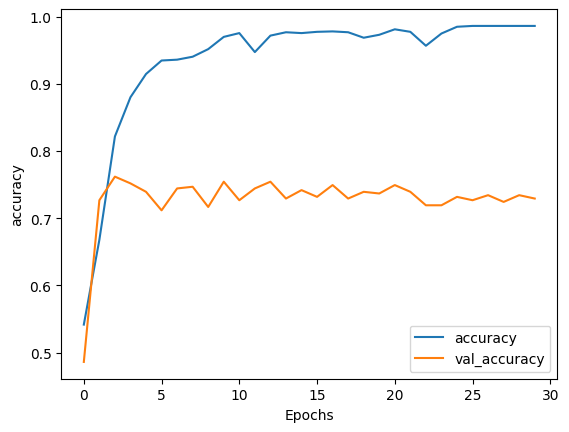

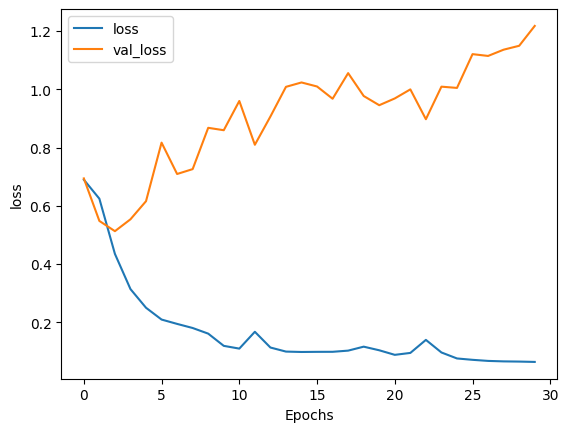

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 668ms/step
[  4 281  16  25   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
I love this phone
[0.99486893]


[812 227 864 100 775   9 525 843   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was cold
[0.00429211]


[812 227 864 100 775   9 109   8 333 731  24  61   4 171  59  77   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was hot exactly as I wanted
[0.00402059]


[812 227 864 100 775   9 157 359 853   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was green
[0

In [32]:
model_multiple_bidi_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim,
                                                       return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

fit_model_and_show_results(model_multiple_bidi_lstm, fake_reviews)

In [33]:
my_reviews =["lovely", "dreadful", "stay away",
             "everything was hot exactly as I wanted",
             "everything was not exactly as I wanted",
             "they gave us free chocolate cake",
             "I've never eaten anything so spicy in my life, my throat burned for hours",
             "for a phone that is as expensive as this one I expect it to be much easier to use than this thing is",
             "we left there very full for a low price so I'd say you just can't go wrong at this place",
             "that place does not have quality meals and it isn't a good place to go for dinner",
             ]

In [35]:
print("===================================\n","Embeddings only:\n", "===================================",)
predict_review(model, my_reviews, show_padded_sequences=False)

 Embeddings only:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
lovely
[0.86704266]


dreadful
[0.40656704]


stay away
[0.62185985]


everything was hot exactly as I wanted
[0.63480794]


everything was not exactly as I wanted
[0.38620004]


they gave us free chocolate cake
[0.62991273]


I've never eaten anything so spicy in my life, my throat burned for hours
[0.0472054]


for a phone that is as expensive as this one I expect it to be much easier to use than this thing is
[0.49092102]


we left there very full for a low price so I'd say you just can't go wrong at this place
[0.782981]


that place does not have quality meals and it isn't a good place to go for dinner
[0.72046053]




In [36]:
print("===================================\n", "With a single bidirectional LSTM:\n", "===================================")
predict_review(model_bidi_lstm, my_reviews, show_padded_sequences=False)

 With a single bidirectional LSTM:


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step
lovely
[0.99084496]


dreadful
[0.00930148]


stay away
[0.32477778]


everything was hot exactly as I wanted
[0.977007]


everything was not exactly as I wanted
[0.00517666]


they gave us free chocolate cake
[0.9566963]


I've never eaten anything so spicy in my life, my throat burned for hours
[0.00627186]


for a phone that is as expensive as this one I expect it to be much easier to use than this thing is
[0.04297438]


we left there very full for a low price so I'd say you just can't go wrong at this place
[0.99905646]


that place does not have quality meals and it isn't a good place to go for dinner
[0.9954501]




In [37]:
print("===================================\n","With two bidirectional LSTMs:\n", "===================================")
predict_review(model_multiple_bidi_lstm, my_reviews, show_padded_sequences=False)

 With two bidirectional LSTMs:


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
lovely
[0.9949301]


dreadful
[0.00322031]


stay away
[0.01562428]


everything was hot exactly as I wanted
[0.00477821]


everything was not exactly as I wanted
[0.00410419]


they gave us free chocolate cake
[0.9926067]


I've never eaten anything so spicy in my life, my throat burned for hours
[0.00334161]


for a phone that is as expensive as this one I expect it to be much easier to use than this thing is
[0.00370619]


we left there very full for a low price so I'd say you just can't go wrong at this place
[0.00343757]


that place does not have quality meals and it isn't a good place to go for dinner
[0.00332205]


